## JuypterNotebook for data exploration and cleaning of CelebA Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import os
os.getcwd()

'/Users/sophiadai/Documents/projects/CV-Final-Project'

In [3]:
attr = pd.read_csv("list_attr_celeba.csv")
attr = attr.replace(-1, 0)
available = set(os.listdir("img_align_celeba"))
attr = attr[attr["image_id"].isin(available)]
attr = attr.reset_index(drop=True)
attr.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000019.jpg,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
1,000021.jpg,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
2,000022.jpg,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
3,000026.jpg,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,000032.jpg,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [4]:
attr.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

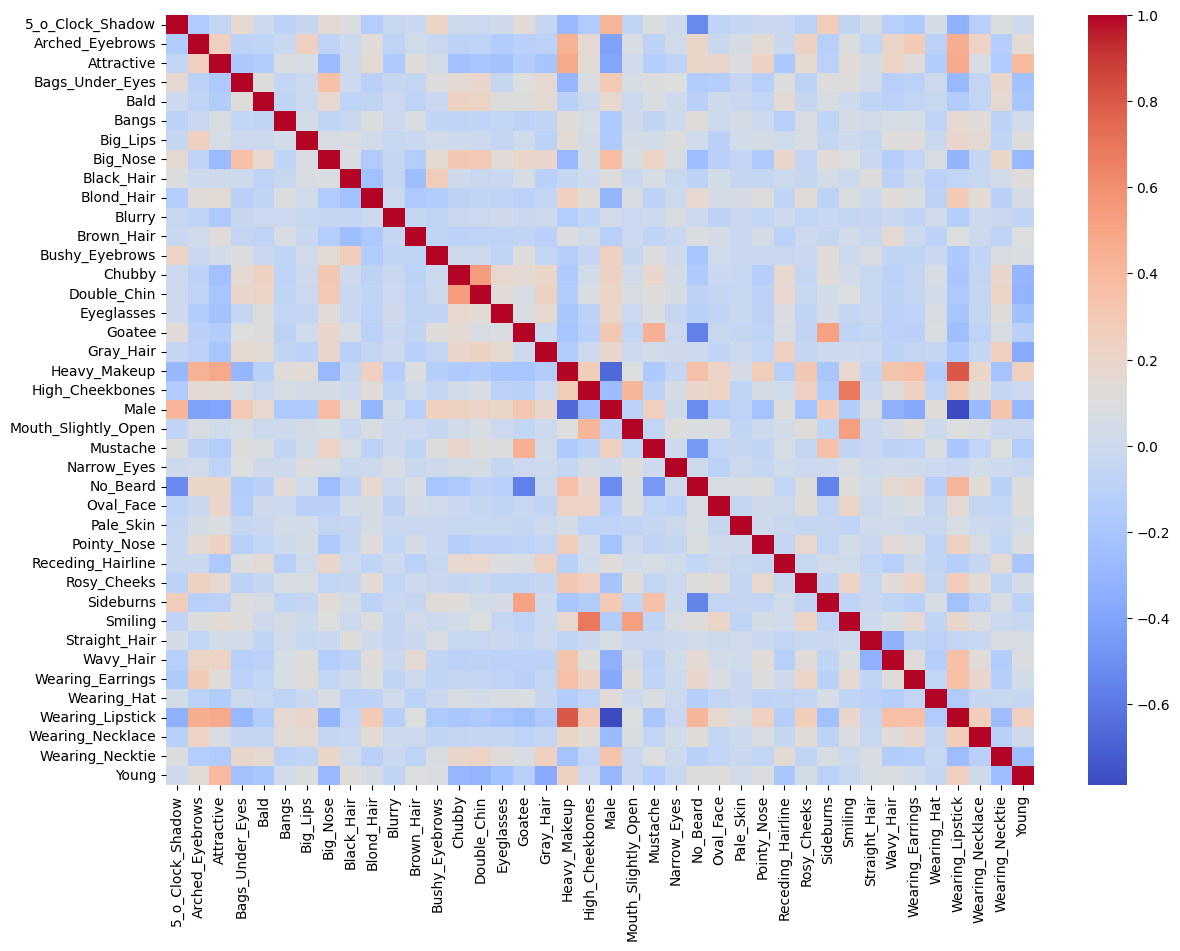

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(attr.iloc[:,1:].corr(), cmap="coolwarm")
plt.show()

In [6]:
from PIL import Image

def show_examples(attribute, n=3):
    imgs = attr[attr[attribute] == 1]["image_id"].head(n).tolist()
    plt.figure(figsize=(10,10))
    for i, img_name in enumerate(imgs):
        img = Image.open(f"./img_align_celeba/{img_name}")
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(attribute)
        plt.axis("off")
    plt.show()

Recommended features to choose from: 
- eyes: Narrow_Eyes, Eyeglasses,
- cheeks: High_Cheekbones, Rosy_Cheeks
- nose: Pointy_Nose, Big_Nose, 
- lips: Big_Lips, 
- misc: Pale_Skin, Oval_Face

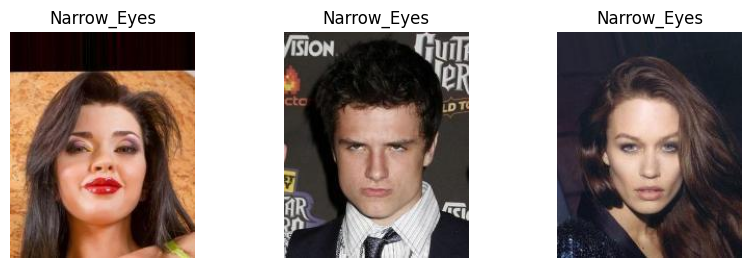

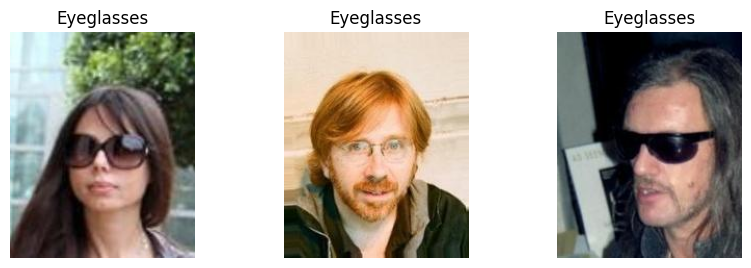

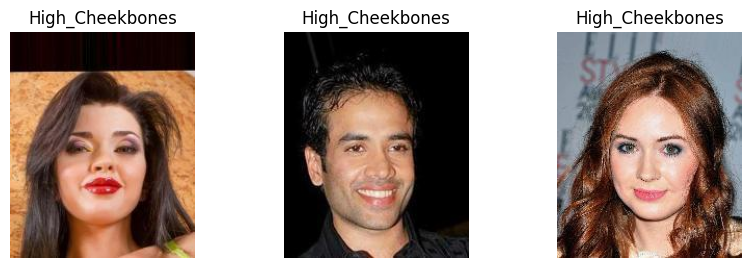

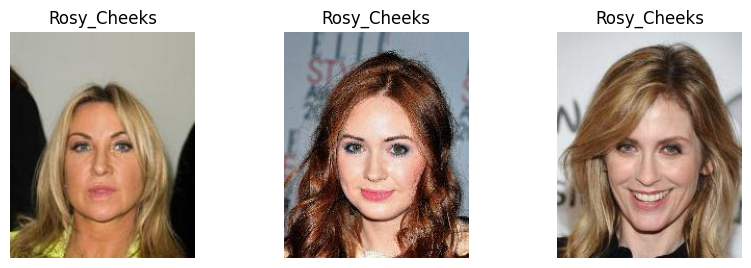

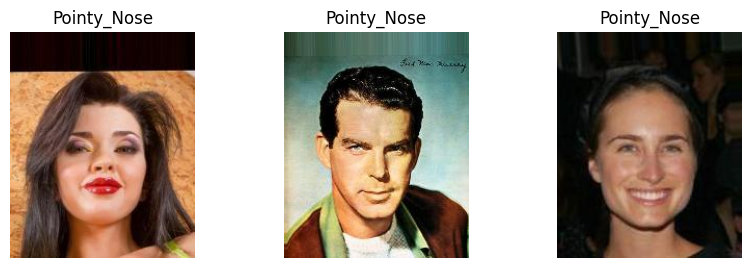

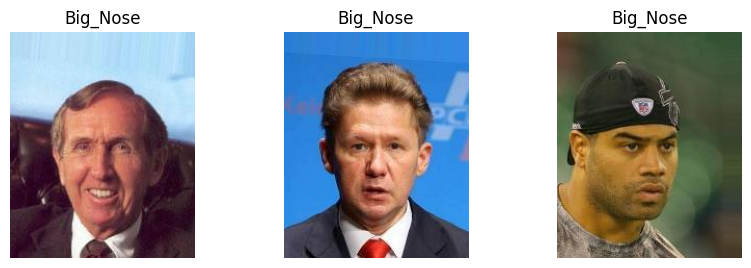

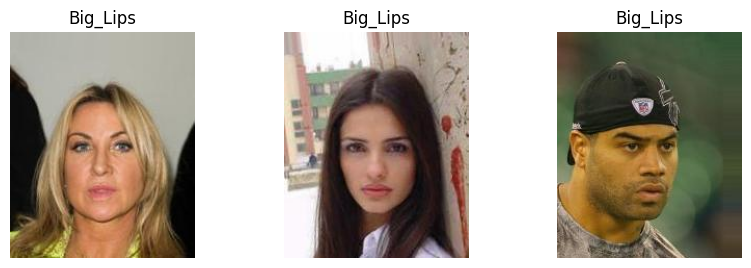

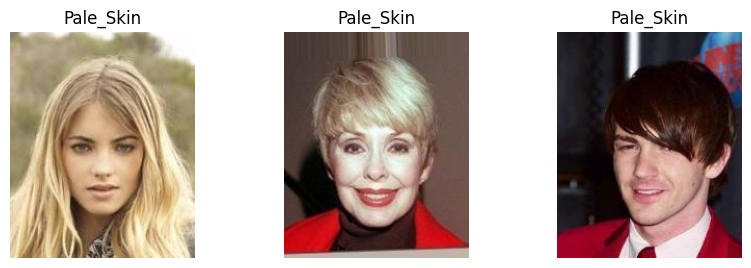

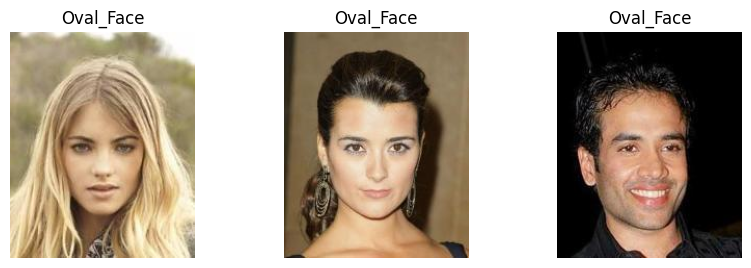

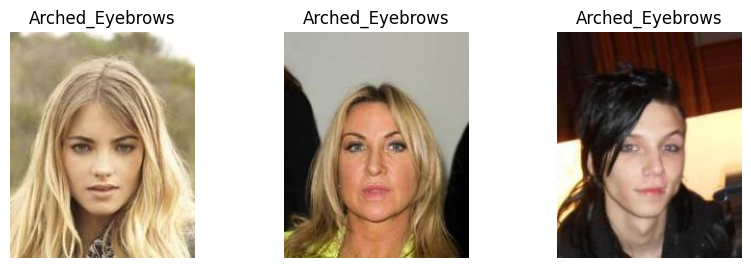

In [7]:
show_examples("Narrow_Eyes")
show_examples("Eyeglasses")
show_examples("High_Cheekbones")
show_examples("Rosy_Cheeks")
show_examples("Pointy_Nose")
show_examples("Big_Nose")
show_examples("Big_Lips")
show_examples("Pale_Skin")
show_examples("Oval_Face")
show_examples("Arched_Eyebrows")

In [20]:
landmarks = pd.read_csv("list_landmarks_align_celeba.csv")
landmarks.head()
df = attr.merge(landmarks, on="image_id", how="inner")
print("Merged dataset size:", len(df))
df.head()

Merged dataset size: 46880


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000019.jpg,0,1,1,0,0,0,0,0,0,...,68,111,108,112,88,134,73,152,104,151
1,000021.jpg,0,0,0,0,0,0,0,1,0,...,70,111,107,111,87,138,73,151,104,154
2,000022.jpg,0,1,0,0,0,0,1,0,0,...,70,111,107,111,85,132,74,153,103,153
3,000026.jpg,0,0,1,0,0,0,1,0,0,...,69,111,108,111,85,135,73,152,103,152
4,000032.jpg,0,0,0,1,0,0,0,1,0,...,72,111,106,110,88,133,75,153,101,155


In [ ]:
def is_front_facing_row(row,
                        eye_tol=0.08,   # allow more tilt
                        nose_tol=0.12): # allow moderate yaw):
    # Eye alignment
    eye_y_diff = abs(row["lefteye_y"] - row["righteye_y"])
    face_height = abs(row["leftmouth_y"] - row["lefteye_y"]) + 1e-6
    eye_align_score = eye_y_diff / face_height

    # Nose centered
    eye_mid_x = (row["lefteye_x"] + row["righteye_x"]) / 2
    eye_dist = abs(row["righteye_x"] - row["lefteye_x"]) + 1e-6
    nose_offset = abs(row["nose_x"] - eye_mid_x) / eye_dist

    return (eye_align_score < eye_tol) or (nose_offset < nose_tol)

front_mask = df.apply(is_front_facing_row, axis=1)
attr_front = df[front_mask].reset_index(drop=True)
print("All images:", len(df))
print("Front-facing images:", len(attr_front))

all images: 46880
Front-facing images: 44745


In [23]:
# Separate features into datasets 

FEATURES = [
    "Narrow_Eyes",
    "Eyeglasses",
    "High_Cheekbones",
    "Rosy_Cheeks",
    "Pointy_Nose",
    "Big_Nose",
    "Big_Lips",
    "Pale_Skin",
    "Oval_Face",
    "Arched_Eyebrows"
]
LANDMARK_COLS = [
    "lefteye_x", "lefteye_y",
    "righteye_x", "righteye_y",
    "nose_x", "nose_y",
    "leftmouth_x", "leftmouth_y",
    "rightmouth_x", "rightmouth_y"
]

KEEP_COLS = ["image_id"] + FEATURES + LANDMARK_COLS

feature_mask = (attr_front[FEATURES] == 1).any(axis=1)
df_selected = attr_front[feature_mask].reset_index(drop=True)
df_selected = df_selected[KEEP_COLS]

print("Before feature filter:", len(attr_front))
print("After feature filter:", len(df_selected))
df_selected.to_csv("celeba_front_facing.csv", index=False)

Before feature filter: 44745
After feature filter: 39436
